## Here, I have imported Python libraries which is needed

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Reading CSV FILE

In [2]:
df = pd.read_csv('Salary_Data.csv')

## top 5 rows using pandas head method for understanding that how our data look like

In [3]:
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


## How big our data is

In [4]:
df.shape

(30, 2)

## Checking duplicates

In [5]:
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

## Mathmatical view of our data

In [6]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


## Datatype of our columns

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


## For checking Outliers

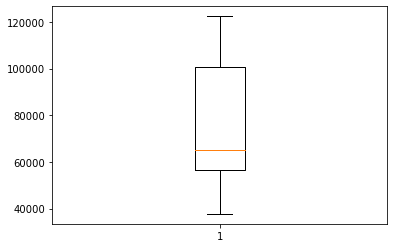

In [8]:
plt.boxplot(df['Salary'])
plt.show()

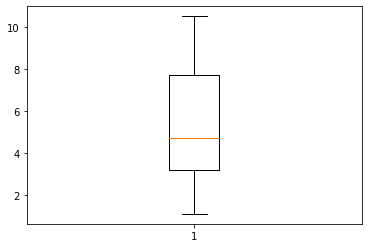

In [9]:
plt.boxplot(df['YearsExperience'])
plt.show()

## this plot is showing that as our experience is increases our salary also increases

<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

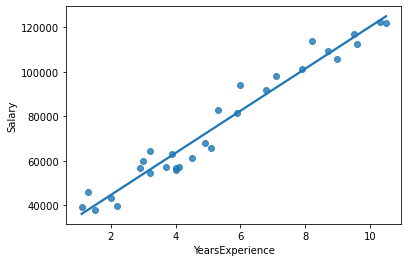

In [10]:
sns.regplot(x = "YearsExperience",
            y = "Salary", 
            ci = None,
            data = df)

## Dividing our data for training and testing 

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df.drop('Salary',axis=1),df['Salary'],test_size=0.3,random_state=0)
                                               
X_train.shape,X_test.shape                           

((21, 1), (9, 1))

In [12]:
y_train

22    101302.0
5      56642.0
16     66029.0
8      64445.0
14     61111.0
23    113812.0
20     91738.0
1      46205.0
29    121872.0
6      60150.0
4      39891.0
18     81363.0
19     93940.0
9      57189.0
7      54445.0
25    105582.0
3      43525.0
0      39343.0
21     98273.0
15     67938.0
12     56957.0
Name: Salary, dtype: float64

In [13]:
y_test

2      37731.0
28    122391.0
13     57081.0
10     63218.0
26    116969.0
24    109431.0
27    112635.0
11     55794.0
17     83088.0
Name: Salary, dtype: float64

## Now we apply supervied learning algo. name LinearRegression for prediction

In [14]:
from sklearn.linear_model import LinearRegression
ln = LinearRegression()
ln.fit(X_train,y_train)

LinearRegression()

In [15]:
predict = ln.predict(X_test)

In [16]:
from sklearn.metrics import r2_score
accuracy = r2_score(y_test,predict)

In [17]:
print("Accuracy is:-",accuracy)

Accuracy is:- 0.9740993407213511


In [18]:
# sns.regplot(x=y_test,y=predict,data=df)